# **Support Vector Machines-1**

### Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear SVM (Support Vector Machine) is:

\[ f(x) = w^T x + b \]

where:
- \( w \) is the weight vector,
- \( x \) is the input feature vector,
- \( b \) is the bias term.

### Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to minimize the following primal problem:

\[ \min_{w,b} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i \]

subject to:

\[ y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \]

where:
- \( w \) is the weight vector,
- \( b \) is the bias term,
- \( \xi_i \) are the slack variables,
- \( y_i \) are the class labels,
- \( x_i \) are the input feature vectors,
- \( C \) is the regularization parameter,
- \( n \) is the number of training examples.

### Q3. What is the kernel trick in SVM?

The kernel trick in SVM allows the algorithm to fit the maximum-margin hyperplane in a transformed feature space. This is achieved by using a kernel function \( K(x_i, x_j) \) that computes the dot product of the input vectors in the higher-dimensional feature space, without explicitly mapping the data to that space. Common kernel functions include the linear, polynomial, and radial basis function (RBF) kernels.

### Q4. What is the role of support vectors in SVM? Explain with an example.

Support vectors are the data points that lie closest to the decision boundary (hyperplane) in an SVM. These points are crucial because they define the position and orientation of the hyperplane. If the support vectors are removed, the hyperplane would change, which highlights their importance.

**Example:**

Consider a binary classification problem where we want to separate two classes with a linear SVM. The support vectors are the points from each class that are closest to the hyperplane. They are the most challenging points to classify, as they are located at the edge of their respective classes.


### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM

**Hyperplane:**
The hyperplane is the decision boundary that separates the classes in SVM. For a linear SVM, it is a straight line (in 2D) or a flat plane (in higher dimensions).

**Marginal Plane:**
The marginal planes are parallel to the hyperplane and are positioned such that the distance between them and the hyperplane is maximized. The region between these planes is called the margin.

**Hard Margin:**
A hard margin SVM requires that all data points are classified correctly and that there are no data points within the margin. This approach works well for linearly separable data.

**Soft Margin:**
A soft margin SVM allows some misclassification or data points within the margin. This is controlled by the regularization parameter \( C \). It is used when the data is not linearly separable.

Below is an illustration of these concepts using Python and matplotlib:

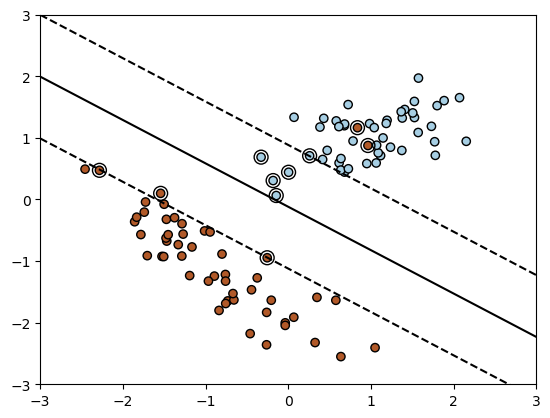

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate some linearly separable data
X, y = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Fit the model
model = SVC(kernel='linear', C=1e5)
model.fit(X, y)

# Get the separating hyperplane
w = model.coef_[0]
b = model.intercept_[0]
xx = np.linspace(-3, 3)
yy = (-w[0] * xx - b) / w[1]

# Plot the data and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.plot(xx, yy, 'k-')

# Plot the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the margins
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_margin1 = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_margin2 = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
plt.plot(xx, yy_margin1, 'k--')
plt.plot(xx, yy_margin2, 'k--')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### Q6. SVM Implementation through Iris dataset

Accuracy: 0.8


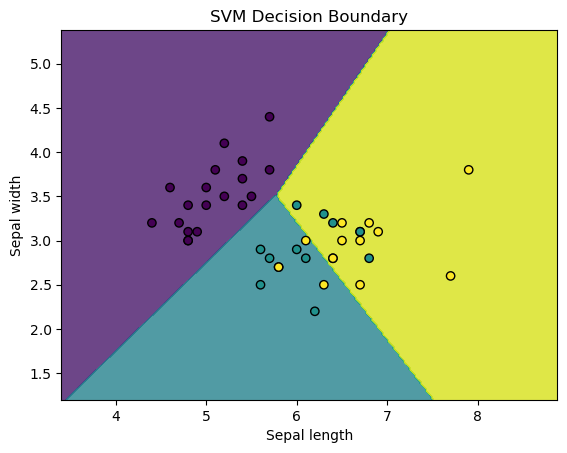

Accuracy with C=0.1: 0.8222222222222222


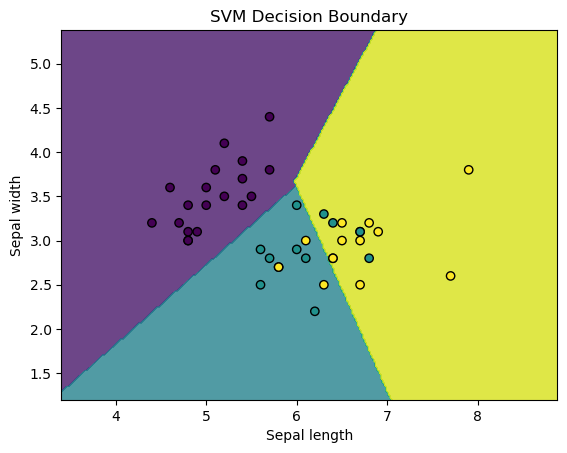

Accuracy with C=1: 0.8


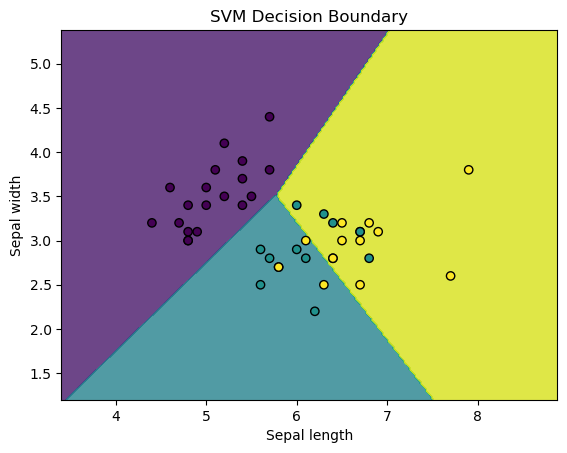

Accuracy with C=10: 0.8


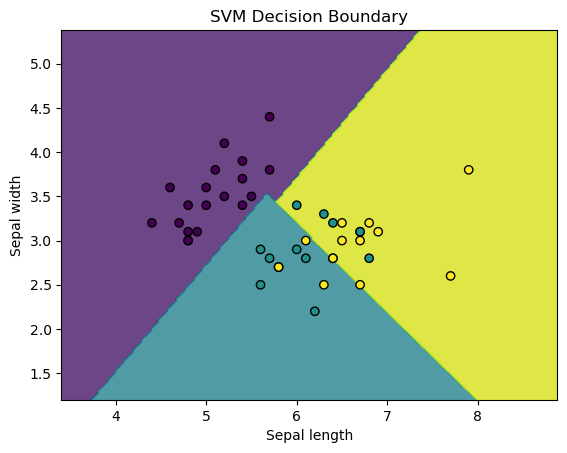

Accuracy with C=100: 0.8


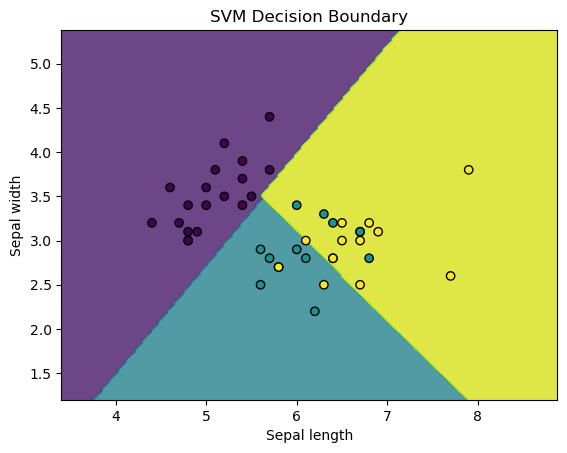

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundaries(X_test, y_test, model)

# Try different values of the regularization parameter C
for C in [0.1, 1, 10, 100]:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy}")
    plot_decision_boundaries(X_test, y_test, model)

### Bonus Task: Implement a linear SVM classifier from scratch using Python


Custom SVM Accuracy: 1.0


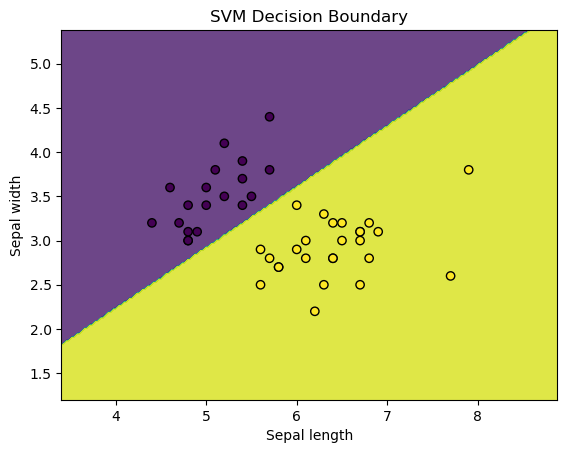

In [3]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take the first two features for visualization purposes
y = iris.target

# Convert to binary classification problem
y = np.where(y == 0, -1, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the custom linear SVM classifier
svm = LinearSVM()
svm.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Custom SVM Accuracy:", accuracy)

# Plot the decision boundaries
plot_decision_boundaries(X_test, y_test, svm)

# Complete